## Data Preprocess

In [1]:
import pandas as pd

names = [
    'age',
    'workclass',
    'fnlwgt',
    'education',
    'education-num',
    'marital-status',
    'occupation',
    'relationship',
    'race',
    'sex',
    'capital-gain',
    'capital-loss',
    'hours-per-week',
    'native-country',
    'income',
]
training_data = pd.read_csv('adult.data', names=names, skipinitialspace=True)
training_data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


## Data Preprocessing

In [2]:
# Drop any rows with missing values
training_data = training_data.dropna()
# training_data["workclass"].value_counts()

# Normalizing the data 
most_common_workclass = training_data["workclass"].mode()[0]
most_common_occupation = training_data["occupation"].mode()[0]
most_common_country = training_data["native-country"].mode()[0]

training_data['workclass'].replace('?', most_common_workclass, inplace=True)
training_data['occupation'].replace('?', most_common_occupation, inplace=True)
training_data['native-country'].replace('?', most_common_country, inplace=True)

## Clustering Model

In [3]:
# Select numerical features for clustering
numerical_features = ['age', 'education-num', 'capital-gain', 'fnlwgt', 'hours-per-week']
X = training_data[numerical_features]


In [4]:
from sklearn.preprocessing import StandardScaler

# Standardize the feature matrix
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [5]:
from sklearn.cluster import KMeans

# Choose the number of clusters (you may need to tune this)
num_clusters = 3

# Apply KMeans clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
training_data['cluster'] = kmeans.fit_predict(X_scaled)

/home/perlic_huang/anaconda3/envs/myenv/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


## Pattern Extraction

In [6]:
# Analyze cluster characteristics
cluster_means = training_data.groupby('cluster').mean()
print("Cluster Means:\n", cluster_means)

Cluster Means:
                age         fnlwgt  education-num  capital-gain  capital-loss  \
cluster                                                                        
0        53.590247  164954.926104       8.694320    463.086403     88.095238   
1        27.879216  217953.717382       9.100222    181.578920     52.908580   
2        39.927465  173838.558203      12.534476   2769.569921    131.670153   

         hours-per-week  
cluster                  
0             37.651750  
1             35.935133  
2             48.683517  


/tmp/ipykernel_182827/3574664704.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cluster_means = training_data.groupby('cluster').mean()


In [7]:
# Access cluster centroids (representative points) in the original feature space
centroids = scaler.inverse_transform(kmeans.cluster_centers_)
centroids_df = pd.DataFrame(centroids, columns=numerical_features)
print("Cluster Centroids:\n", centroids_df)


Cluster Centroids:
          age  education-num  capital-gain         fnlwgt  hours-per-week
0  53.552821       8.693945    465.280073  164856.899966       37.667620
1  27.870975       9.102376    181.480346  218160.928640       35.930935
2  39.927969      12.536500   2770.000388  173716.206689       48.685507


In [8]:
# Analyze the size of each cluster
cluster_sizes = training_data['cluster'].value_counts()
print("Cluster Sizes:\n", cluster_sizes)


Cluster Sizes:
 1    13520
2    10326
0     8715
Name: cluster, dtype: int64


In [9]:
cluster_centers = kmeans.cluster_centers_
feature_importance = pd.DataFrame(cluster_centers, columns=X.columns)
print("feature_importance:\n", feature_importance)


feature_importance:
         age  education-num  capital-gain    fnlwgt  hours-per-week
0  1.097575      -0.539023     -0.082919 -0.236114       -0.224328
1 -0.785227      -0.380266     -0.121347  0.268906       -0.364982
2  0.098702       0.954577      0.229155 -0.152178        0.668008


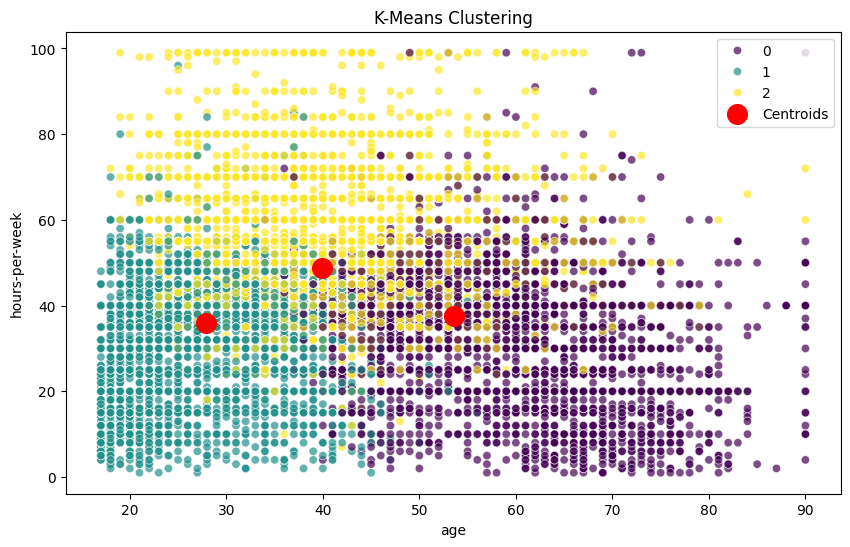

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize clusters by plotting centroids and data points in the feature space
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='hours-per-week', hue='cluster', data=training_data, palette='viridis', alpha=0.7)
# plt.scatter(training_data['age'], training_data['hours-per-week'], c=training_data['cluster'], cmap='viridis', alpha=0.5)
plt.scatter(centroids_df['age'], centroids_df['hours-per-week'], marker='o', s=200, c='red', label='Centroids')
plt.title('K-Means Clustering')
plt.legend()
plt.show()


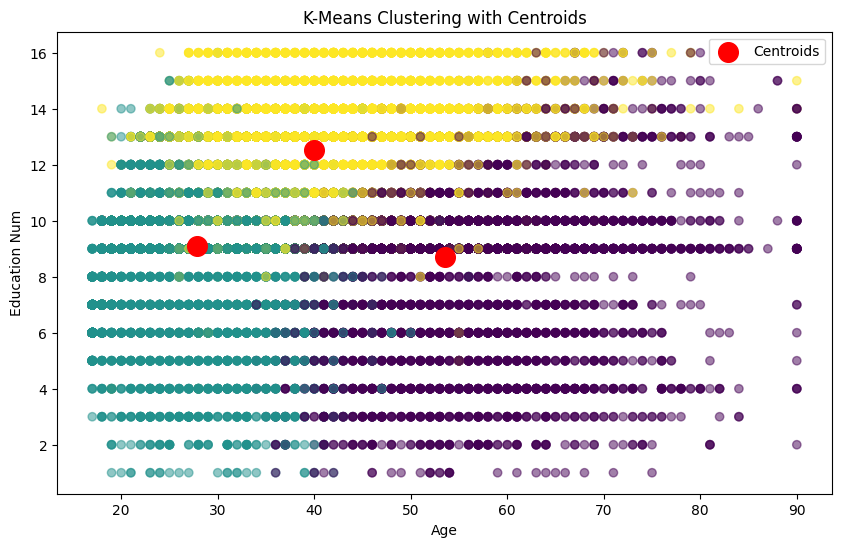

In [11]:
# Visualize clusters by plotting centroids and data points in the feature space
plt.figure(figsize=(10, 6))
plt.scatter(training_data['age'], training_data['education-num'], c=training_data['cluster'], cmap='viridis', alpha=0.5)
# sns.scatterplot(x='age', y='education-num', hue='cluster', data=training_data, palette='viridis', alpha=0.7)
plt.scatter(centroids_df['age'], centroids_df['education-num'], marker='o', s=200, c='red', label='Centroids')
plt.xlabel('Age')
plt.ylabel('Education Num')
plt.title('K-Means Clustering with Centroids')
plt.legend()
plt.show()


/tmp/ipykernel_182827/3872633485.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(cluster_data[feature], label=f'Cluster {cluster_label}', shade=True)
/tmp/ipykernel_182827/3872633485.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(cluster_data[feature], label=f'Cluster {cluster_label}', shade=True)
/tmp/ipykernel_182827/3872633485.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(cluster_data[feature], label=f'Cluster {cluster_label}', shade=True)


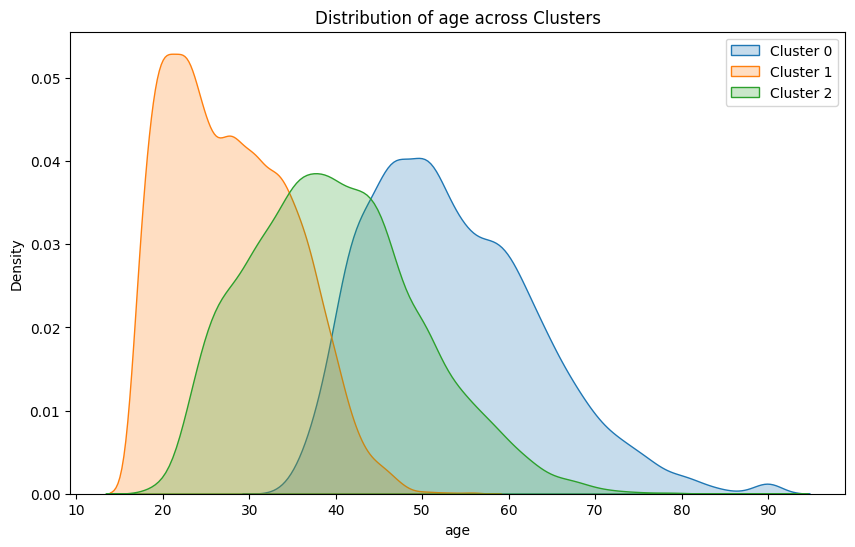

/tmp/ipykernel_182827/3872633485.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(cluster_data[feature], label=f'Cluster {cluster_label}', shade=True)
/tmp/ipykernel_182827/3872633485.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(cluster_data[feature], label=f'Cluster {cluster_label}', shade=True)
/tmp/ipykernel_182827/3872633485.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(cluster_data[feature], label=f'Cluster {cluster_label}', shade=True)


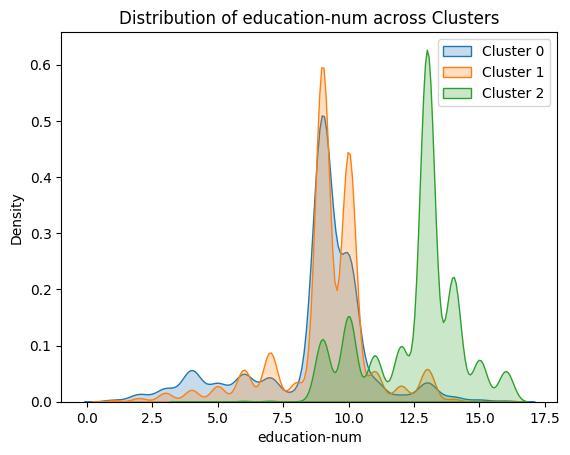

/tmp/ipykernel_182827/3872633485.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(cluster_data[feature], label=f'Cluster {cluster_label}', shade=True)
/tmp/ipykernel_182827/3872633485.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(cluster_data[feature], label=f'Cluster {cluster_label}', shade=True)
/tmp/ipykernel_182827/3872633485.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(cluster_data[feature], label=f'Cluster {cluster_label}', shade=True)


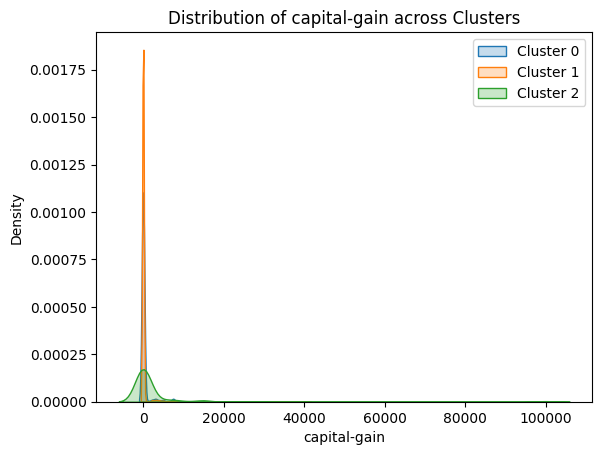

/tmp/ipykernel_182827/3872633485.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(cluster_data[feature], label=f'Cluster {cluster_label}', shade=True)
/tmp/ipykernel_182827/3872633485.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(cluster_data[feature], label=f'Cluster {cluster_label}', shade=True)
/tmp/ipykernel_182827/3872633485.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(cluster_data[feature], label=f'Cluster {cluster_label}', shade=True)


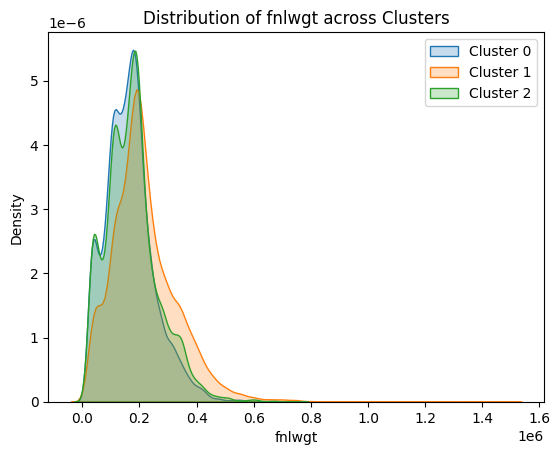

/tmp/ipykernel_182827/3872633485.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(cluster_data[feature], label=f'Cluster {cluster_label}', shade=True)
/tmp/ipykernel_182827/3872633485.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(cluster_data[feature], label=f'Cluster {cluster_label}', shade=True)
/tmp/ipykernel_182827/3872633485.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(cluster_data[feature], label=f'Cluster {cluster_label}', shade=True)


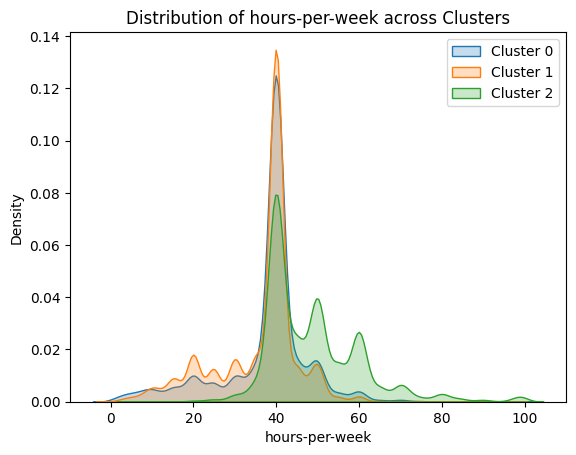

In [12]:
# Compare feature distributions between clusters
plt.figure(figsize=(10, 6))

for feature in numerical_features:
    for cluster_label, cluster_data in training_data.groupby('cluster'):
        sns.kdeplot(cluster_data[feature], label=f'Cluster {cluster_label}', shade=True)
    plt.title(f'Distribution of {feature} across Clusters')
    plt.xlabel(feature)
    plt.ylabel('Density')
    plt.legend()
    plt.show()

## Model Performance Evaluation

In [13]:
# Inertia
inertia = kmeans.inertia_
print("Inertia (Within-Cluster Sum of Squares):", inertia)

Inertia (Within-Cluster Sum of Squares): 120612.7431771406


In [14]:
from sklearn.metrics import silhouette_score

# Silhouette Score
silhouette_avg = silhouette_score(X_scaled, kmeans.labels_)
print("Silhouette Score:", silhouette_avg)


Silhouette Score: 0.19778432273481106


In [15]:
from sklearn.metrics import calinski_harabasz_score

ch_score = calinski_harabasz_score(X_scaled, kmeans.labels_)
print(f"Calinski-Harabasz Index: {ch_score}")


Calinski-Harabasz Index: 5694.685514796646


In [16]:
from sklearn.metrics import davies_bouldin_score

db_score = davies_bouldin_score(X_scaled, kmeans.labels_)
print(f"Davies-Bouldin Index: {db_score}")


Davies-Bouldin Index: 1.6207416097138179
